# 1. Understanding the given data

Data files available:
1. Training data-> sales_train.csv
2. Testing data->  test.csv
3. Additional data:
   i) Item_categories- item_categories.csv
   ii) items- items.csv
   iii)shops details- shops.csv
4. sample submission file- sample_submission.csv
 

In [26]:
# import important libraries
import pandas as pd
import numpy as np

#handle warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)


In [2]:
# Reading all the csv file
train_df=pd.read_csv('sales_train.csv')
test_df=pd.read_csv('test.csv')
item_cat_df=pd.read_csv('item_categories.csv')
item_df=pd.read_csv('items.csv')
shop_df=pd.read_csv('shops.csv')
submission_df=pd.read_csv('sample_submission.csv')

In [3]:
#To print first few line of each data
print("Training Data")
print(train_df.head())
print("=============================================================================")
print("Testing Data")
print(test_df.head())
print("=============================================================================")
print("Items Categories")
print(item_cat_df.head())
print("=============================================================================")
print("Items")
print(item_df.head())
print("=============================================================================")
print("Shops")
print(shop_df.head())
print("=============================================================================")
print("Sample Submission")
print(submission_df.head())
print("=============================================================================")

Training Data
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
Testing Data
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
Items Categories
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
Items
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВА

From above data it can be concluded that:
1. date_block_num -> Is unique for every month for the particular year
2. date_block_num column is missing in the test data, need to added. date_block_num should be one greater than
largest date_block_num in training data set
3. For each item id, item category is defined
4. For each shop, shop id is provided
5. shop id-> item_id->item_category

In [4]:
# Basic information about the training data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


Except "date" column, all other columns data are numerical

In [5]:
# Check the null values 
print("Training Data")
print(train_df.isnull().sum())
print('--------------------------------------')
print("Test Data")
print(test_df.isnull().sum())
print('--------------------------------------')
print("Item categories")
print(item_cat_df.isnull().sum())
print('--------------------------------------')
print("Item")
print(item_df.isnull().sum())
print('--------------------------------------')
print("Shop")
print(shop_df.isnull().sum())
print('--------------------------------------')

Training Data
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
--------------------------------------
Test Data
ID         0
shop_id    0
item_id    0
dtype: int64
--------------------------------------
Item categories
item_category_name    0
item_category_id      0
dtype: int64
--------------------------------------
Item
item_name           0
item_id             0
item_category_id    0
dtype: int64
--------------------------------------
Shop
shop_name    0
shop_id      0
dtype: int64
--------------------------------------


There is no null values in the Training, Testing, Item Categories, Items and Shops data

In [6]:
# Check for duplicate values in data
print('\t\t Total Data \t\t Duplicate Data')
print("Training Data\t  %d \t\t     %d"%(len(train_df),len(train_df[train_df.duplicated()==True])))
print("Test Data    \t  %d \t\t     %d"%(len(train_df),len(test_df[test_df.duplicated()==True])))
print("Item Categ   \t  %d \t\t\t     %d"%(len(item_cat_df),len(item_cat_df[item_cat_df.duplicated()==True])))
print("Item         \t  %d \t\t     %d"%(len(item_df),len(item_df[item_df.duplicated()==True])))
print("Shops        \t  %d \t\t\t     %d"%(len(shop_df),len(shop_df[shop_df.duplicated()==True])))  


		 Total Data 		 Duplicate Data
Training Data	  2935849 		     6
Test Data    	  2935849 		     0
Item Categ   	  84 			     0
Item         	  22170 		     0
Shops        	  60 			     0


There are 6 duplicate data in training set , need to remove it from the data set

In [7]:
# Drop the duplicate data
train_df.drop_duplicates(keep='first', inplace=True)
print("Shape of train_df after dropping the duplicate data: ",train_df.shape)

Shape of train_df after dropping the duplicate data:  (2935843, 6)


In [8]:
# TO check the number of uniques shops, unique item categories id, unique item id
print("No of unique shop id= %d"%shop_df.shop_id.nunique())
print("No of unique item category id=%d"%item_cat_df.item_category_id.nunique())
print("No of unique item id=%d"%item_df.item_id.nunique())

No of unique shop id= 60
No of unique item category id=84
No of unique item id=22170


# 2. Exploratory Data Analysis

1. Histogram for item_price in train_df (Normal scale and Log Scale)
2. Box Plot for item_price in train_df  (Normal Scale and Log Scale)
3. Calculate the meadian alue of item price
4. Calculate the interquartile range

In [9]:
# Import important libraries
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh as bk
%matplotlib inline
#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.titlesize'] = 14

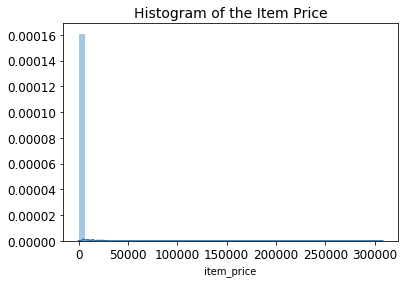

In [10]:
#Create the histogram for item price 
sns.distplot(train_df['item_price'])
plt.title('Histogram of the Item Price')
plt.show()

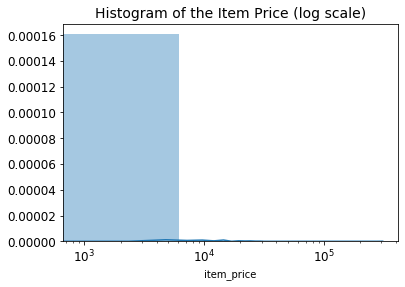

In [11]:
#histogram of the item price
sns.distplot(train_df['item_price'])
plt.xscale('log')
plt.title('Histogram of the Item Price (log scale)')
plt.show()

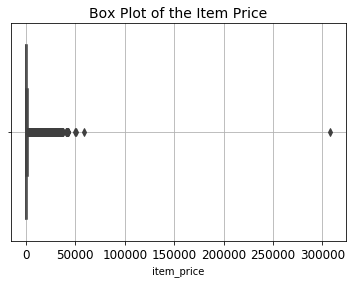

In [12]:
# For Box plot
sns.boxplot(train_df['item_price'],orient='h')
plt.title('Box Plot of the Item Price')
plt.grid()
plt.show()

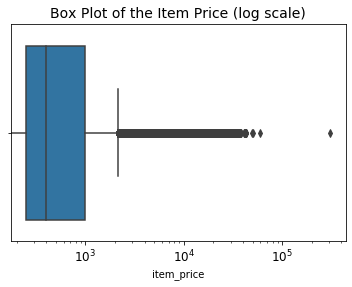

In [13]:
# To plot Box plot in log scale
sns.boxplot(train_df['item_price'],orient='h')
plt.xscale('log')
plt.title('Box Plot of the Item Price (log scale)')
plt.show()

In [14]:
# New data frame based on Maximum and Minimum values
new_df=train_df[(train_df.item_price<=Maximum)&(train_df.item_price>=Minimum)]
new_df.head()

NameError: name 'Maximum' is not defined

In [ ]:
# Plot the histogram based on new_df
sns.distplot(new_df.item_price)
plt.title('Histogram for item price (New_df)')
plt.show()

In [ ]:
# To plot histogram for item_price based on new_df (Log Scale)
sns.distplot(new_df.item_price)
plt.title('Histogram for item price (New_df)')
plt.xscale('log')
plt.show()

In [ ]:
# Findout the Minimum and maximum item_price
print("Maximum item price:%f"%train_df.item_price.max())
print("Minimum item price:%f"%train_df.item_price.min())

In [ ]:
# convert item_price data in 1000 bins
intensity_cut=pd.cut(train_df.item_price,1000)
intensity_cut

In [ ]:
# To find the frquency of data in each bins
pd.value_counts(intensity_cut,normalize=True)

In [ ]:
# To find the minimum and maximum values of item_price
print("Minimum value of item_price:%f"%train_df.item_price.min())
print("Maximum value of item price:%f"%train_df.item_price.max())

Minimum value of item price is Negative. Need further investigation, How many item_price is negative.

In [ ]:
# To find out negative values in item_price and item_cnt_day
print("Number of negative values in item_price: %d"%(len(train_df[train_df.item_price<0])))
print("Number of Negative values in item_cnt_day: %d"%(len(train_df[train_df.item_cnt_day<0])))

There is only 1 observation related to negative item price. But in case of item_cnt_day, total negative values are 7356, which 
is significant in number

In [ ]:
# To find the top shops where item count is maximum
X=train_df[train_df.item_cnt_day<0]
X.shop_id.value_counts(normalize=True).sort_values(ascending=False).to_frame()[:10]

# Data Cleaning, Outlier detection and Removal

In [ ]:
# Replace negative values of item_cnt_day with 0
train_df.item_cnt_day.mask(train_df.item_cnt_day<0,0,inplace=True)

In [ ]:
#Replace the negative priced items with median value
train_df.item_price.mask(train_df.item_price<0,train_df.item_price.median(),inplace=True)

In [ ]:
#Calculate the median value of item price
median=train_df.item_price.median()
print("Median=%.2f"%median)
#Calculate Interquartile Range
Q1,Q3=np.percentile(train_df.item_price,[25,75])
print("Q1=%f Q3=%f"%(Q1,Q3))
IQR=Q3-Q1
print("Interquartile Range:%f"%IQR)

In [ ]:
# Calculate the Maximum and Minimum values of item price based on box plot
Maximum=Q3+1.5*IQR
Minimum=Q1-1.5*IQR
print("Maximum=%.1f,Minimum=%.1f"%(Maximum,Minimum))

In [ ]:
# Find out the number of item_price data is greater than maximum and less than minimum values
print(len(train_df[train_df.item_price>=Maximum])*100/len(train_df))
print(len(train_df[train_df.item_price<=Minimum])*100/len(train_df))

8.8% of data are more than Maximum values
It is wise decision to remove outliers.

In [ ]:
#Removing the outlier
#Upper bound item price data
upper=np.where(train_df.item_price>=Maximum)
#Lower bound item price data
lower=np.where(train_df.item_price<=Minimum)

# Remove the outliers
train_df=train_df[(train_df.item_price<=Maximum)&(train_df.item_price>=Minimum)]

# Training data shape after removal for outlier
print("Shape of train_df after removing outliers:",train_df.shape)

In [ ]:
#Removing the negative item_cnt_day columns
train_df=train_df[train_df.item_cnt_day>0]
print("Shape of train_df after removing the negative item_cnt_day: ",train_df.shape)

# Data Preparation 

1.Create date_block_num inn the test data
2.As data wise sales data provided, all the sales data need to be aggregated by using groupby functin


In [17]:
# Create the date_block_num in test.csv file . date_count_num must be one more than the maximum value of date_block_num in training dataframe
test_df['date_block_num']=train_df.date_block_num.max()+1
test_df.head()

,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34


In [18]:
# Data aggregation
training_data =train_df.groupby(by=['date_block_num','shop_id','item_id'],as_index=False)['item_cnt_day'].apply(sum)

# Feature Engineering

1. Add the lag feature based on shop_id and item_id
2. Mean and Median column to be added based on shop and items
3. Fill NaN values with 0

In [19]:
test_df.head()

,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34


In [56]:
# Concat the training and testing data
data=pd.concat([training_data,test_df],axis=0)
data.head()

,date_block_num,shop_id,item_id,item_cnt_day,ID
0,0,0,32,6.0,NaN
1,0,0,33,3.0,NaN
2,0,0,35,1.0,NaN
3,0,0,43,1.0,NaN
4,0,0,51,2.0,NaN


In [59]:
#add lag features based on the shop id and item id
data['shop_lag_1'] = data.groupby('shop_id')['item_cnt_day'].shift(1)
data['shop_lag_2'] = data.groupby('shop_id')['item_cnt_day'].shift(2)

data['item_lag_1'] = data.groupby('item_id')['item_cnt_day'].shift(1)
data['item_lag_2'] = data.groupby('item_id')['item_cnt_day'].shift(2)


In [60]:
#Replace NaN values with zeros
data.fillna(0.0,inplace=True)

# Training the different Model

1. Preprocessing the data using StandardScalar,MinMaxScaler,Power Transformer,Polynomial Features
2. Decomposition using PCA
3. Pipeline 
4. Models to be used- RandomForestClassifier,LinearRegression,GradientBoostingRegressor
5. Evaluation metrics- Mean squared error

In [61]:
#import important libraries for data processing
from sklearn.preprocessing import (StandardScaler,MinMaxScaler,PowerTransformer)
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [89]:
#Importing the library for training the models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


In [108]:
# train test split
testing_data=data[data['date_block_num']==34]
final_train=data[data['date_block_num']!=34]
X=final_train.drop(['ID','item_cnt_day'],axis=1)
Standardisation=StandardScaler()
X = Standardisation.fit_transform(X)
X_submission=Standardisation.fit_transform(testing_data.drop(['ID','item_cnt_day'],axis=1))
y=final_train.item_cnt_day
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.10,random_state=25)

In [85]:
ls=LinearRegression()
ls.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_pred=ls.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

44.15293839819274

In [76]:
# After teh feature scaling
Standardisation=StandardScaler()
X_train = Standardisation.fit_transform(X_train)


In [79]:
ls.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
rf=RandomForestRegressor(n_estimators=10,n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [92]:
y_pred_rf=rf.predict(X_test)

In [93]:
mean_squared_error(y_test,y_pred_rf)

32.9792011832481

In [ ]:
gbs=GradientBoostingRegressor(learning_rate=0.25,n_estimators=1000,max_depth=3)
gbs.fit(X_train,y_train)

In [120]:
y_pred_gb=gbs.predict(X_test)

In [121]:
mean_squared_error(y_test,y_pred_gb)

35.164175315079696

In [100]:
y_test

518371     1.0
83779      2.0
135246     1.0
547942     1.0
1406119    3.0
          ... 
1415100    1.0
222996     1.0
273382     1.0
707024     1.0
1335691    1.0
Name: item_cnt_day, Length: 160913, dtype: float64

In [101]:
y_pred_gb

array([2.20191603, 1.32660962, 1.32660962, ..., 1.16577166, 2.50803062,
       1.28375449])

In [102]:
testing_data.head()

,date_block_num,shop_id,item_id,item_cnt_day,ID,shop_lag_1,shop_lag_2,item_lag_1,item_lag_2
0,34,5,5037,0.0,0.0,1.0,1.0,1.0,1.0
1,34,5,5320,0.0,1.0,0.0,1.0,0.0,0.0
2,34,5,5233,0.0,2.0,0.0,0.0,3.0,1.0
3,34,5,5232,0.0,3.0,0.0,0.0,1.0,2.0
4,34,5,5268,0.0,4.0,0.0,0.0,0.0,0.0


In [109]:
#Prediction on testing data
y_submission=gbs.predict(X_submission)

In [110]:
submission_df.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [111]:
submission_df['item_cnt_month']=y_submission

In [112]:
submission_df.head()

,ID,item_cnt_month
0,0,23.522401
1,1,3.082688
2,2,4.381289
3,3,3.540141
4,4,1.860632
